In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

dataset


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [97]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [98]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# explotary data analysis

In [100]:
#correlation and covariance
corr = df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

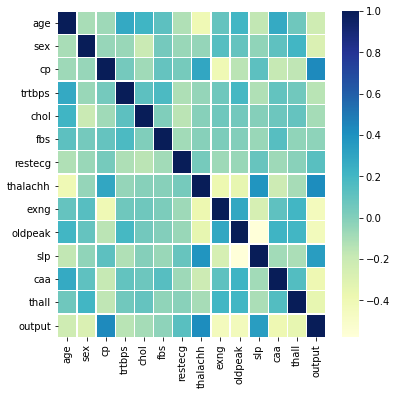

In [101]:
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(corr, ax=ax, cmap="YlGnBu", linewidths=0.3)

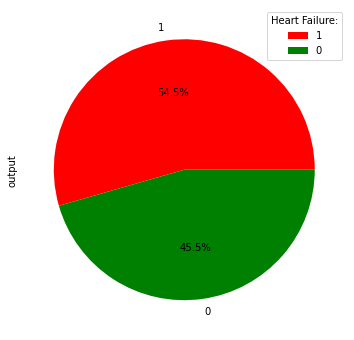

In [102]:
plt.figure(1, figsize=(6,6))
df['output'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "r", "g"),labels = df['output'].unique(), shadow = False)
plt.legend(title = "Heart Failure:")
plt.show()

<AxesSubplot:ylabel='thall'>

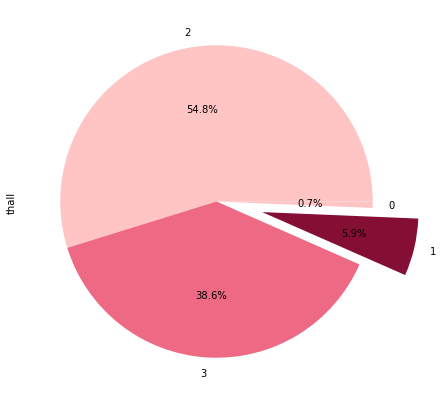

In [103]:
round(df['thall'].value_counts()/ df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',
 figsize =(7, 10),explode=(0,0,0.3,0),colors=['#FFC4C4','#EE6983','#850E35'])

In [104]:
round(df['sex'].value_counts()/ df.shape[0]*100,2)

1    68.32
0    31.68
Name: sex, dtype: float64

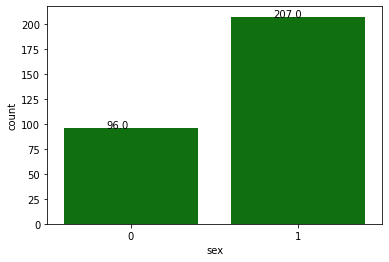

In [105]:
ax = sns.countplot(x="sex", data=df,color='g')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

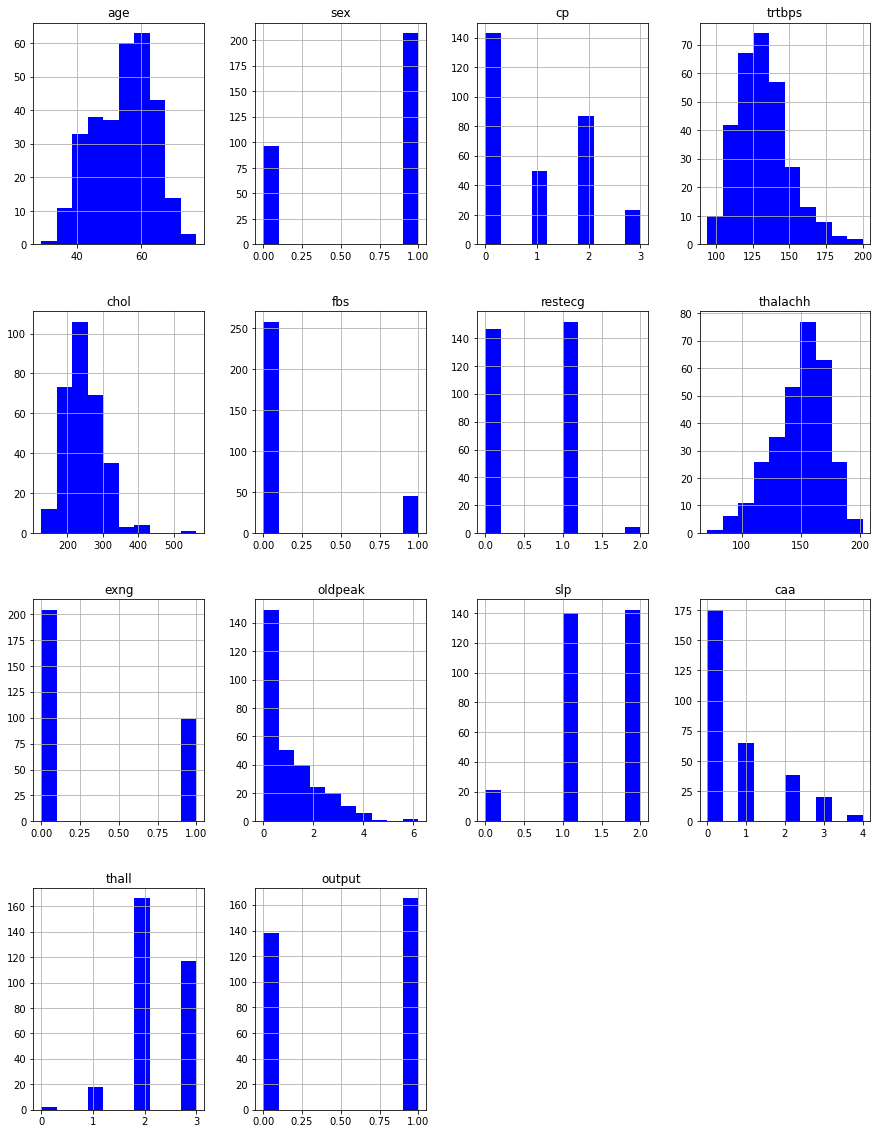

In [106]:
# plot histograms for each numerical variable
df.hist(figsize = (15, 20),color='b')
plt.show()

In [107]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

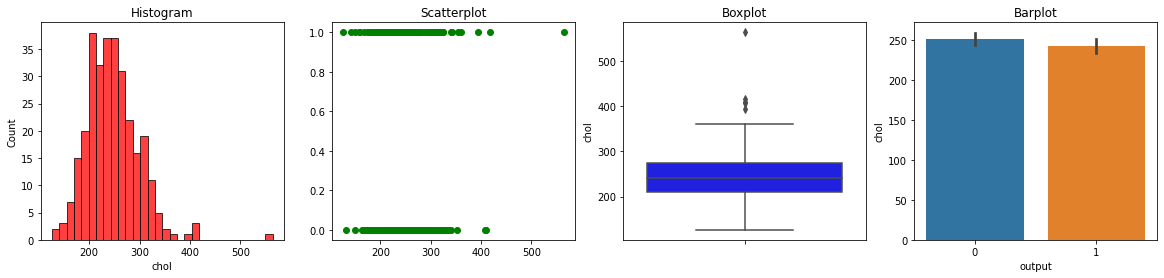

In [108]:
diagnostic_plots(df,'chol','output')

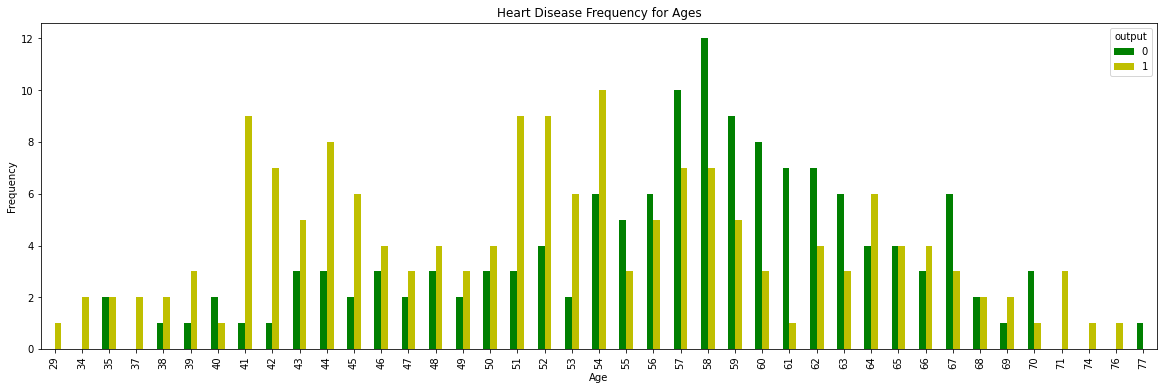

In [109]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6),color= ['green','y'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

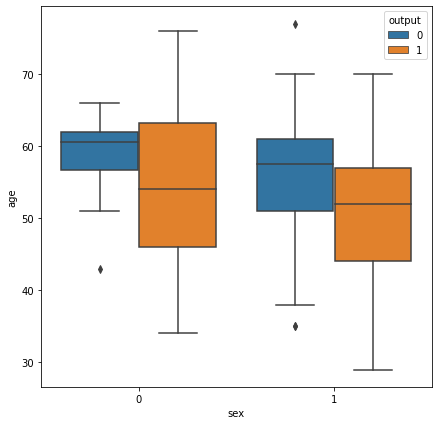

In [110]:
fig, ax = plt.subplots(figsize=(7,7))

sns.boxplot(x='sex', y='age', hue='output', data=df, ax=ax)

In [111]:
# outlier

In [112]:
def detect_outliers(df,features):
    df_copy = df.drop(df[(df[features] == 0)].index)
    # 1st quartile
    q1 = df_copy[features].quantile(0.25)
    # 3rd quartile
    q3 = df_copy[features].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    outlier_list_col = df_copy[(df_copy[features] >= Upper_tail) | (df_copy[features] <= Lower_tail)]  # | means "or"
    return pd.DataFrame(outlier_list_col)

In [113]:
chol_outlier = detect_outliers(df,'chol')
chol_outlier

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [114]:
chol_outlier.value_counts(chol_outlier['output'])

output
1    3
0    2
dtype: int64

In [115]:
# missing values

In [116]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [117]:
df['AgeGroup']= np.nan
df.loc[(df['age']>=28) & (df['age']<35),'AgeGroup']='Young Adult' 
df.loc[(df['age']>=35) & (df['age']<=64),'AgeGroup']='Adult'
df.loc[df['age']>64,'AgeGroup']='Seniors'
df['AgeGroup'].value_counts()

Adult          259
Seniors         41
Young Adult      3
Name: AgeGroup, dtype: int64

<AxesSubplot:xlabel='thall', ylabel='output'>

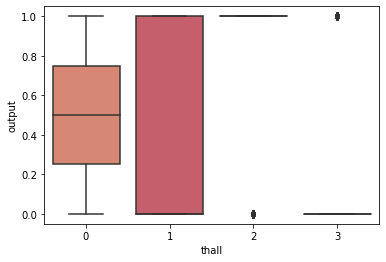

In [118]:
# realtion ship between thall and heart attack
sns.boxplot(x="thall", y="output", data=df,palette="flare")

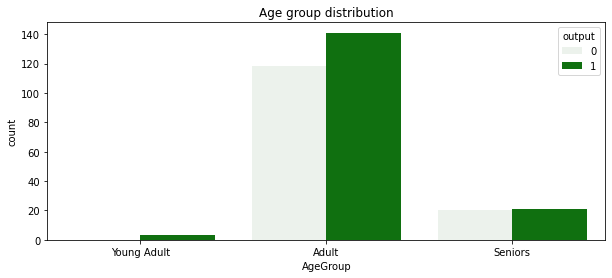

In [119]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='AgeGroup', hue='output', order=['Young Adult','Adult','Seniors'],color='g')
plt.title('Age group distribution')
plt.show()

# regression logistic

In [120]:
df_features = ['age','sex','cp','chol','slp','caa','thall']
x=df[df_features]
y= df.output
x.sample(10)

,age,sex,cp,chol,slp,caa,thall
70,54,1,2,258,1,0,3
82,60,0,2,318,2,1,2
90,48,1,2,255,2,2,2
264,54,1,0,206,1,1,2
231,57,1,0,289,1,3,3
124,39,0,2,199,2,0,2
160,56,1,1,240,0,0,2
162,41,1,1,157,2,0,2
134,41,0,1,306,2,0,2
223,56,0,0,288,0,2,3


In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train.shape, x_test.shape

((272, 7), (31, 7))

In [122]:
mdl = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print("Training_score : " , mdl.score(x_train, y_train))

Training_score :  0.8419117647058824


In [123]:
y_pred = mdl.predict(x_test)
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.sample(10)

,predicted,actual
247,0,0
287,1,0
240,0,0
14,1,1
195,0,0
110,1,1
84,1,1
180,0,0
166,0,0
294,0,0


In [124]:
from sklearn.metrics import accuracy_score

print("Testing
      _score : ", accuracy_score(y_test, y_pred))

Testing_score :  0.7741935483870968


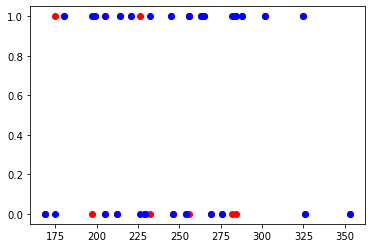

In [125]:
plt.scatter(x_test['chol'], y_test, color = 'r')
plt.scatter(x_test['chol'], y_pred, color = 'b')

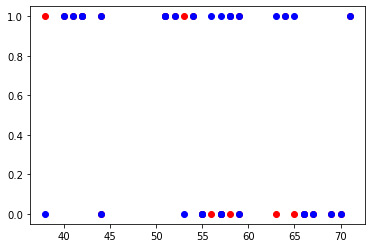

In [126]:
plt.scatter(x_test['age'], y_test, color = 'r')
plt.scatter(x_test['age'], y_pred, color = 'b')

<AxesSubplot:>

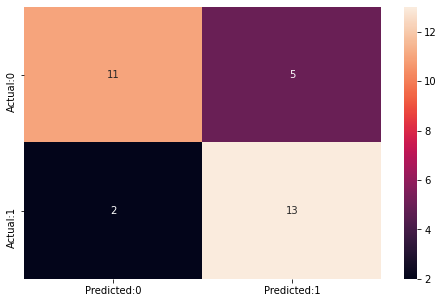

In [127]:
# confession matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

# Decision Tree Classifier

In [128]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [129]:
y_pred = clf.predict(x_test)
clfAcc = accuracy_score(y_test,y_pred)
clfAcc


0.6774193548387096

<AxesSubplot:>

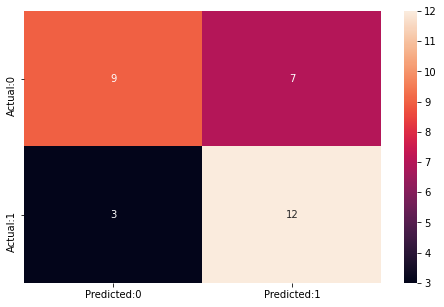

In [130]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')